In [2]:
from jyro.simulator import *
import math

In [3]:
sim = Physics()

In [4]:
def world(sim):
    sim.addBox(0, 0, 5, 5, fill="backgroundgreen", wallcolor="lightgrey") # meters
    sim.addBox(1, 1, 2, 2, "purple")
    ## brightness of 1 is radius 1 meter
    sim.addLight(4, 4, 1.00, color=Color(255, 255, 0, 64))
    sim.addLight(4, 2, 1.00, color=Color(255, 255, 0, 64))

In [5]:
world(sim)

In [6]:
import random

class MyPioneer(Pioneer):
    def __init__(self, name, x, y, angle):
        Pioneer.__init__(self, name, x, y, angle)
        self.addDevice(PioneerFrontSonars(maxRange=5.0))
        #self.addDevice(Gripper())
        self.addDevice(PioneerFrontLightSensors(5))

    def brain(self):
        self.move(random.random() * 2 - 1,
                  random.random() * 2 - 1)

In [7]:
robot = MyPioneer("Pioneer", 2.50, 4.50, math.pi / 2) # meters, radians

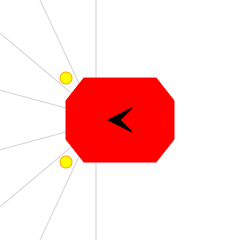

In [8]:
robot

In [9]:
sim.addRobot(robot)

In [10]:
canvas = Canvas((250, 250))

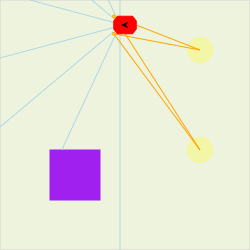

In [11]:
sim.draw(canvas)

In [12]:
robot.move(1, 1)

In [13]:
from IPython.display import display, clear_output

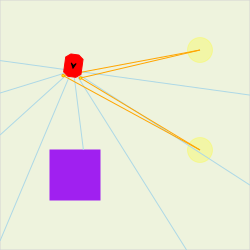

CPU times: user 121 ms, sys: 19.4 ms, total: 140 ms
Wall time: 6.41 s


In [15]:

%%time

import time

for i in range(70):
    sim.step(run_brain=False)
    for r in sim.robots:
        sim.draw(canvas)
        clear_output(wait=True)
        display(canvas)
        time.sleep(.085) # sleep for a bit

In [17]:
robot.getPose()

(2.131189710834815, 2.5525752006395126, 4.43805509807653)

In [19]:
%%time

import numpy

light0 = numpy.zeros((100,100))
light1 = numpy.zeros((100,100))

robot.setPose(2.50, 4.50, math.pi / 2)
for i in range(70):
    sim.step(run_brain=False)
    for r in sim.robots:
        x, y, a = robot.getPose()
        print(x, y, a)
        light0[int(y/canvas.max_y * 100), int(x/canvas.max_x * 100)] = r.device["light"].scan[0]
        light1[int(y/canvas.max_y * 100), int(x/canvas.max_x * 100)] = r.device["light"].scan[1]

2.4 4.5 1.6707963267948966
2.3004995834721975 4.490016658335318 1.7707963267948967
2.202492925688073 4.470149725255811 1.8707963267948968
2.1069592767755125 4.440597704589677 1.970796326794897
2.014853177375224 4.401655870358812 2.070796326794897
1.9270949211861865 4.353713316498391 2.170796326794897
1.8445613596952186 4.297249069158887 2.270796326794897
1.7680771409667697 4.232827300435118 2.3707963267948973
1.6984064700320531 4.161091691345166 2.4707963267948974
1.6362454732049867 4.082759000382418 2.5707963267948974
1.5822152426181728 3.9986119019016284 2.6707963267948975
1.5368556304756151 3.909491165895485 2.7707963267948976
1.500619855027948 3.8162872572987623 2.8707963267948977
1.4738699721654893 3.719931438757043 2.970796326794898
1.4568732578754653 3.621386465758197 3.070796326794898
1.4497995377086952 3.5216369670977916 3.170796326794898
1.4527194899388243 3.4216796067936412 3.270796326794898
1.4656039393683769 3.322513125748394 3.370796326794898
1.4883241488376857 3.22512836

In [20]:

%matplotlib inline
import matplotlib.pyplot as plt

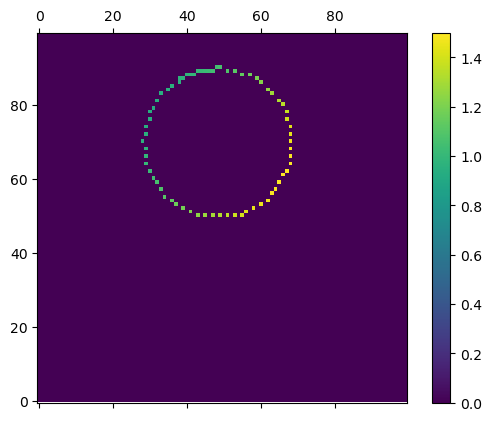

In [21]:
fig1 = plt.figure()
sp0 = fig1.add_subplot(111)
p0 = sp0.matshow(light0, origin="lower")
fig1.colorbar(p0)

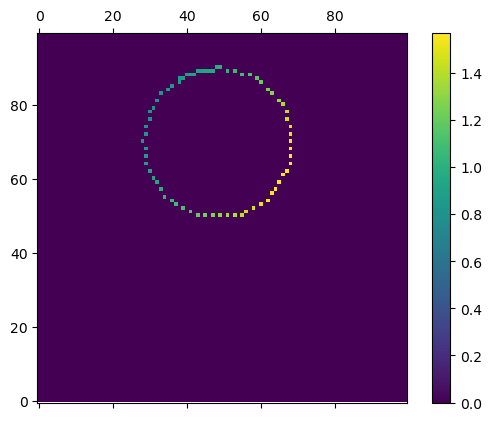

In [23]:
fig2 = plt.figure()
sp1 = fig2.add_subplot(111)
p1 = sp1.matshow(light1, origin="lower")
fig2.colorbar(p1)

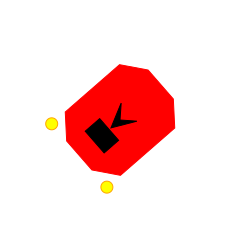

In [24]:

robot.addDevice(Camera(120, 80))

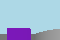

In [25]:
robot.device["camera"].getImage()

In [26]:
robot.move(0, .5)
for i in range(10):
    sim.step(run_brain=False)

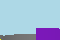

In [28]:
robot.device["camera"].getImage()

In [29]:
vsim = VSimulator(robot, world)
robot.brain = lambda self: self.move(1,1)